In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

fL = './ReadShowLeather/data/Leder.csv'
fH = './ReadShowLeather/data/Holz.csv'
fF = './ReadShowLeather/data/Fleisch.csv'
fS = '2016skin.csv'
fM = '2016material.csv'
fMF = '2016material-fake.csv'

Files = [fL, fH, fF, fM, fMF, fS]
decimals = [',',',',',','.','.','.']
Y_values= [0,0,0,0,0,1]

data = np.zeros((1,3))
for i, f in enumerate(Files):
    df = pd.read_csv(f, delimiter=';',decimal=decimals[i], index_col=0)
    df = df.dropna()
    for col in df.columns:
        Y=np.ones((len(df[col]),1))*Y_values[i]
        X1=df.index.to_numpy().reshape((-1,1))
        X2=df[col].to_numpy().reshape((-1,1))
        d=np.hstack((X1,X2,Y))
        data = np.vstack((data,d))
np.random.shuffle(data)
data = np.delete(data, 0, 0)

X= data[:,:2].reshape((-1,2))
Y= data[:,2]

print(X, Y)


[[1085.           26.07184952]
 [ 940.          114.24083465]
 [1032.           26.74826698]
 ...
 [1332.           19.7307853 ]
 [1498.           12.56197405]
 [1567.            6.57609888]] [1. 0. 1. ... 1. 1. 0.]


In [5]:
from catboost import CatBoostClassifier, Pool

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7, random_state=42)

cat_model = CatBoostClassifier(
    iterations = 5000, # 1000 are ideal
    leaf_estimation_iterations = 200,
    learning_rate = 0.05,
    loss_function = "Logloss",
    task_type = "CPU",
    verbose=True,
)

# training the model
cat_model.fit(X_train,y_train)

# predicting the model output
y_pred_cat = cat_model.predict(X_test)
# printing the accuracy of the tuned model
print("accuracy of the catboost: ",accuracy_score(y_test,y_pred_cat))

# confusion metrics of the LightGBM and plotting the same
confusion_matrix_LightGBM = confusion_matrix(y_test,y_pred_cat)
print(confusion_matrix_LightGBM) 

0:	learn: 0.6144341	total: 713ms	remaining: 59m 24s
1:	learn: 0.5498229	total: 1.3s	remaining: 54m 9s
2:	learn: 0.4989181	total: 1.89s	remaining: 52m 33s
3:	learn: 0.4483616	total: 2.62s	remaining: 54m 31s
4:	learn: 0.4108917	total: 3.19s	remaining: 53m 8s
5:	learn: 0.3794051	total: 3.85s	remaining: 53m 29s
6:	learn: 0.3518050	total: 4.41s	remaining: 52m 24s
7:	learn: 0.3285464	total: 5.06s	remaining: 52m 37s
8:	learn: 0.3073679	total: 5.61s	remaining: 51m 48s
9:	learn: 0.2868165	total: 6.17s	remaining: 51m 18s
10:	learn: 0.2715317	total: 6.85s	remaining: 51m 47s
11:	learn: 0.2578507	total: 7.47s	remaining: 51m 44s
12:	learn: 0.2471869	total: 8.21s	remaining: 52m 31s
13:	learn: 0.2372057	total: 8.95s	remaining: 53m 6s
14:	learn: 0.2270227	total: 9.55s	remaining: 52m 54s
15:	learn: 0.2193060	total: 10.1s	remaining: 52m 35s
16:	learn: 0.2127413	total: 10.6s	remaining: 51m 55s
17:	learn: 0.2073007	total: 11.3s	remaining: 52m 3s
18:	learn: 0.2010424	total: 11.9s	remaining: 52m 10s
19:	lear

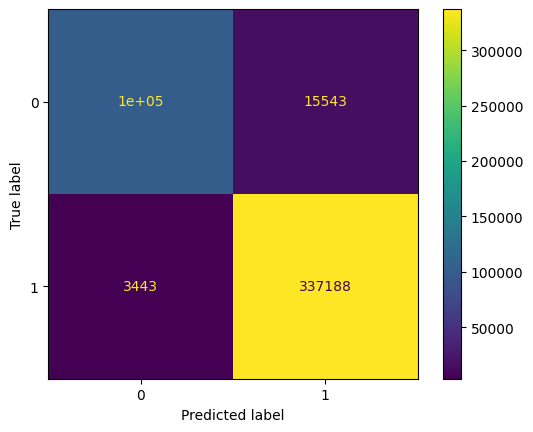

In [6]:
cm_svc = confusion_matrix(y_test, y_pred_cat)
disp_svc = ConfusionMatrixDisplay(cm_svc)
disp_svc.plot()